In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Image_Segmentation.csv")

Using TensorFlow backend.


In [2]:
column = ['Y']
y_array = np.array(column)
y= df['Y']

y = pd.get_dummies(y)
y_train = y.loc[0:1999]
y_test = y.loc[2000:2299]
# Drop column B as it is now encoded
df_new = df.drop('Y',axis = 1)
#normalise data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_new)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns+=1
df_normalized.insert(0, 'A0', 1)

#Splitting datasets 2000 training and 300 test
x_train = df_normalized.loc[0:1999]
x_test = df_normalized.loc[2000:2299]

In [3]:
# 1 hidden layer 5 neurons
total = 0
acc1=[] 
while total < 10:
    model = Sequential()
    model.add(Dense(5, input_dim=20, kernel_regularizer=regularizers.l2(0.01), activation='relu'))    
    model.add(Dense(7, activation='softmax'))               
    sgd = SGD(lr=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=20, batch_size=5, verbose=0)
    test_acc = model.evaluate(x_test, y_test, verbose=0)
    acc1.append(test_acc[1])
    total+=1
print('Accuracy:',acc1)
print('Mean accuracy:', np.mean(acc1)*100)

Accuracy: [0.6966666579246521, 0.8799999952316284, 0.8666666746139526, 0.7733333110809326, 0.8833333253860474, 0.8133333325386047, 0.7733333110809326, 0.8733333349227905, 0.8233333230018616, 0.6100000143051147]
Mean accuracy: 79.93333280086517


In [4]:
# 2 hidden layers 5 neurons each
total = 0
acc2=[] 
while total < 10:
    model = Sequential()
    model.add(Dense(5, input_dim=20, kernel_regularizer=regularizers.l2(0.01), activation='relu'))    
    model.add(Dense(5, activation='relu'))  
    model.add(Dense(7, activation='softmax'))               
    sgd = SGD(lr=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=20, batch_size=5, verbose=0)
    test_acc = model.evaluate(x_test, y_test, verbose=0)
    acc2.append(test_acc[1])
    total+=1
print('Accuracy:',acc2)
print('Mean accuracy:', np.mean(acc2)*100)

Accuracy: [0.7133333086967468, 0.7833333611488342, 0.7433333396911621, 0.6499999761581421, 0.7099999785423279, 0.8199999928474426, 0.79666668176651, 0.8166666626930237, 0.7633333206176758, 0.6100000143051147]
Mean accuracy: 74.0666663646698


In [5]:
# 1 hidden layer 25 neurons
acc3=[] 
total = 0
while total < 10:
    model = Sequential()
    model.add(Dense(25, input_dim=20, kernel_regularizer=regularizers.l2(0.01), activation='relu'))    
    model.add(Dense(7, activation='softmax'))               
    sgd = SGD(lr=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=5, verbose=0)
    train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_acc = model.evaluate(x_test, y_test, verbose=0)
    acc3.append(test_acc[1])
    total+=1
print('Accuracy:',acc3)
print('Mean accuracy:', np.mean(acc3)*100)

Accuracy: [0.8733333349227905, 0.8733333349227905, 0.746666669845581, 0.8866666555404663, 0.8399999737739563, 0.7133333086967468, 0.8866666555404663, 0.75, 0.800000011920929, 0.8399999737739563]
Mean accuracy: 82.09999918937683


In [6]:
# 2 hidden layers 25 neurons each
acc4 =[]
total = 0
while total < 10:
    model = Sequential()
    model.add(Dense(25, input_dim=20, kernel_regularizer=regularizers.l2(0.01), activation='relu'))    
    model.add(Dense(25, activation='relu'))    
    model.add(Dense(7, activation='softmax'))               
    sgd = SGD(lr=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=5, verbose=0)
    test_acc = model.evaluate(x_test, y_test, verbose=0)
    acc4.append(test_acc[1])
    total+=1
print('Accuracy:',acc4)
print('Mean accuracy:', np.mean(acc4)*100)

Accuracy: [0.9100000262260437, 0.6033333539962769, 0.8500000238418579, 0.8199999928474426, 0.8299999833106995, 0.8733333349227905, 0.8366666436195374, 0.8733333349227905, 0.7433333396911621, 0.7699999809265137]
Mean accuracy: 81.10000014305115


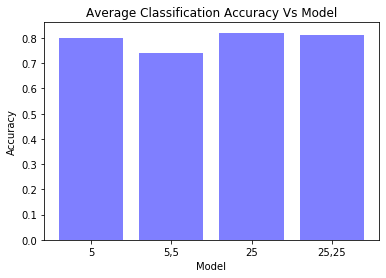

In [7]:
objects = ('5', '5,5', '25', '25,25')
y_pos = np.arange(len(objects))
performance = [np.mean(acc1), np.mean(acc2), np.mean(acc3), np.mean(acc4)]
for i in range(4):
    plt.bar(y_pos[i], performance[i], align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Average Classification Accuracy Vs Model')
 
plt.show()